In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 3 - Insurance Claims Case Study/claims.csv')
cust = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/3. Python Foundation Case Studies/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [3]:
insurance_data = pd.merge(left=claims, right=cust, how='inner', left_on='customer_id', right_on='CUST_ID')

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [4]:
insurance_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [5]:
del insurance_data['CUST_ID']

In [6]:
insurance_data.claim_id = insurance_data.claim_id.astype('str')

In [7]:
insurance_data.customer_id = insurance_data.customer_id.astype('str')

In [8]:
insurance_data.claim_date = pd.to_datetime(insurance_data.claim_date)

In [9]:
insurance_data.DateOfBirth = pd.to_datetime(insurance_data.DateOfBirth)

**Some year value becomes incorrect**

In [10]:
dateofbirth = insurance_data.DateOfBirth

In [11]:
l0 = []
for i in dateofbirth:
    if i.year >= 2060:
        i = i.replace(year = i.year-100)
    l0.append(i)

In [12]:
insurance_data.DateOfBirth = pd.Series(l0)

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [13]:
insurance_data.claim_amount = insurance_data.claim_amount.str.replace('$','')

In [14]:
insurance_data.claim_amount = insurance_data.claim_amount.astype('float')

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [15]:
insurance_data['flag_police_report'] = np.where(insurance_data.police_report == 'No', 0,
                                                np.where(insurance_data.police_report == 'Yes', 1, np.nan))

### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
**Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.**

In [16]:
unique_customer = insurance_data.groupby(['customer_id']).first().reset_index()

In [17]:
unique_customer

,customer_id,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag_police_report
0,10149231,77526829,Other causes,2018-04-24,Auto,Unknown,Material and injury,34780.0,3.0,No,Female,1992-03-22,FL,291-942-3485,Platinum,NaN
1,10198314,50022306,Other causes,2018-05-01,Auto,Unknown,Injury only,28658.0,1.0,Yes,Female,1980-11-10,WI,176-861-1936,Platinum,NaN
2,10330113,26308516,Other causes,2017-12-17,Auto,No,Material and injury,29060.0,3.0,No,Female,1996-02-23,ID,124-294-1973,Platinum,0.0
3,10462042,38641457,Other causes,2018-08-03,Home,No,Material only,2410.0,1.0,No,Female,1964-06-06,WA,351-316-3172,Platinum,0.0
4,10665308,46956597,Natural causes,2018-07-20,Auto,No,Material only,NaN,1.0,No,Male,1999-06-21,CT,324-971-8395,Silver,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,1965-01-28,UT,517-562-4916,Silver,0.0
1074,99723844,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,1966-06-19,HI,457-752-1374,Gold,1.0
1075,99761663,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,1963-11-18,NC,643-246-4718,Silver,0.0
1076,99892000,22960702,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,Male,1995-06-08,OR,395-246-6172,Gold,0.0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [18]:
insurance_data.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'flag_police_report'],
      dtype='object')

In [19]:
continuous = ['claim_amount']
categorical = ["incident_cause", "claim_area", "claim_type", "fraudulent", "gender", "State", "Segment", "flag_police_report"]

In [20]:
insurance_data[continuous] = insurance_data[continuous].fillna(insurance_data[continuous].mean())

In [21]:
#insurance_data['State'].mode()[0]

In [22]:
for columns in categorical:
    insurance_data[columns] = insurance_data[columns].fillna(insurance_data[columns].mode()[0])

In [23]:
#insurance_data['incident_cause'].isna().sum()

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

**Children < 18
<br/>
Youth 18-30
<br/>
Adult 30-60
<br/>
Senior > 60**

In [24]:
insurance_data['Age'] = round((insurance_data.claim_date - insurance_data.DateOfBirth).apply(lambda x : x.days)/365.25, 2)

In [25]:
insurance_data['Age_group'] = np.where(insurance_data.Age < 18,'Children',
                                       np.where(insurance_data.Age < 30,'youth',
                                                np.where(insurance_data.Age < 60,'Adult',
                                                         np.where(insurance_data.Age > 60, 'Senior',np.nan))))

In [26]:
insurance_data.groupby(['Age_group'])[['Age_group']].count().add_prefix('count_of_').reset_index()

,Age_group,count_of_Age_group
0,Adult,750
1,Children,8
2,youth,327


### 8. What is the average amount claimed by the customers from various segments?

In [27]:
insurance_data.groupby(['Segment'])[['claim_amount']].mean().add_prefix('Avg_').reset_index()

,Segment,Avg_claim_amount
0,Gold,12829.631974
1,Platinum,12341.952267
2,Silver,12208.435570


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [28]:
prior_insurance_data = insurance_data.loc[insurance_data.claim_date < '2018-09-10',:]

In [29]:
prior_insurance_data.groupby(['incident_cause'])[['claim_amount']].sum().reset_index()

,incident_cause,claim_amount
0,Crime,7.244484e+05
1,Driver error,3.319952e+06
2,Natural causes,1.314121e+06
3,Other causes,3.724985e+06
4,Other driver error,3.318770e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [30]:
#insurance_data.loc[insurance_data.incident_cause.str.lower().str.contains("driver"),:]
#insurance_data.loc[insurance_data.State == 'TX',:]
#insurance_data.loc[insurance_data.State == 'DE',:]
#insurance_data.loc[insurance_data.State == 'AK',:]

In [31]:
driver_rel_insurance_data = insurance_data.loc[(insurance_data.incident_cause.str.lower().str.contains("driver")) & ((insurance_data.State == 'TX') | (insurance_data.State == 'DE') | (insurance_data.State == 'AK')),:]

In [32]:
driver_rel_insurance_data = driver_rel_insurance_data.loc[driver_rel_insurance_data.Age_group == 'Adult']

In [33]:
driver_rel_insurance_data.groupby('State')[['Age_group']].count().reset_index()

,State,Age_group
0,AK,9
1,DE,9
2,TX,6


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [34]:
seg_gen_agg = insurance_data.pivot_table(index='gender', columns='Segment',values='claim_amount',aggfunc='sum')

In [35]:
seg_gen_agg

Segment,Gold,Platinum,Silver
gender,,,
Female,2.109738e+06,2.369484e+06,1.901912e+06
Male,2.701374e+06,2.098303e+06,2.346624e+06


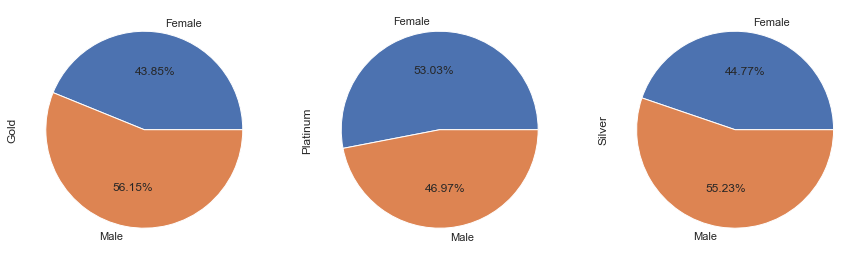

In [36]:
seg_gen_agg.plot(kind='pie', subplots = True, legend=False, figsize = (15,8), autopct = '%.2f%%')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [37]:
incident_cause_driver = insurance_data.loc[insurance_data.incident_cause.str.lower().str.contains("driver")]

In [38]:
gen_driv = incident_cause_driver.groupby('gender')[['gender']].count().add_prefix('Count_of_').reset_index()

In [39]:
gen_driv

,gender,Count_of_gender
0,Female,222
1,Male,284


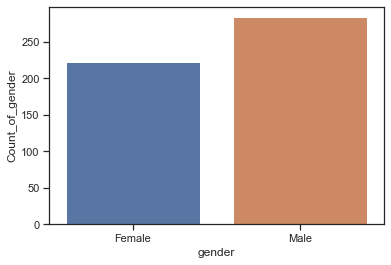

In [40]:
sns.barplot(x='gender',y='Count_of_gender',data=gen_driv)
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [41]:
fraudulent_insurance_data = insurance_data.loc[insurance_data.fraudulent == 'Yes']

In [42]:
fraud_age_group = fraudulent_insurance_data.groupby(['Age_group'])[['fraudulent']].count().reset_index()

In [43]:
fraud_age_group

,Age_group,fraudulent
0,Adult,173
1,Children,1
2,youth,73


<AxesSubplot:xlabel='Age_group', ylabel='fraudulent'>

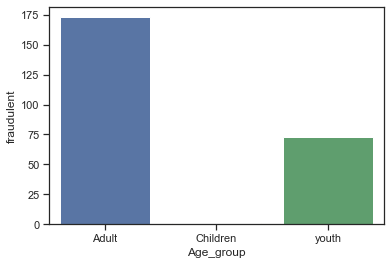

In [44]:
sns.barplot(x='Age_group',y='fraudulent',data=fraud_age_group)

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [45]:
insurance_data['claim_month'] = insurance_data.claim_date.dt.month

In [46]:
monthly_claim_amount = insurance_data.groupby('claim_month')[['claim_amount']].sum()

In [47]:
monthly_claim_amount

,claim_amount
claim_month,
1,1.331992e+06
2,1.169906e+06
3,1.320080e+06
4,1.293886e+06
5,1.114189e+06
6,1.278826e+06
7,1.379010e+06
8,9.111950e+05
9,9.828598e+05


Text(0, 0.5, 'claim_amount')

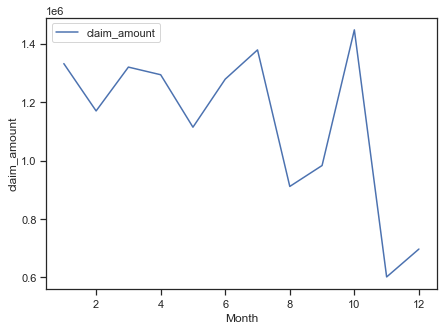

In [48]:
monthly_claim_amount.plot(figsize=(7,5))
plt.xlabel('Month')
plt.ylabel('claim_amount')

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [49]:
avg_claim_amt = insurance_data.groupby(['Age_group','gender','fraudulent'])[['claim_amount']].mean().add_prefix('Avg_').reset_index()

In [50]:
avg_claim_amt

,Age_group,gender,fraudulent,Avg_claim_amount
0,Adult,Female,No,12414.770365
1,Adult,Female,Yes,12461.895425
2,Adult,Male,No,12116.798779
3,Adult,Male,Yes,17062.062958
4,Children,Female,No,11210.000000
5,Children,Male,No,18316.000000
6,Children,Male,Yes,32407.000000
7,youth,Female,No,12300.530286
8,youth,Female,Yes,7598.811819
9,youth,Male,No,12295.833059


In [51]:
fraud_avg_claim_amt = avg_claim_amt.pivot_table(index='fraudulent',columns=['Age_group','gender'],values='Avg_claim_amount',aggfunc='mean')

In [52]:
fraud_avg_claim_amt

Age_group          Adult               Children                  youth  \
gender            Female          Male   Female     Male        Female   
fraudulent                                                               
No          12414.770365  12116.798779  11210.0  18316.0  12300.530286   
Yes         12461.895425  17062.062958      NaN  32407.0   7598.811819   

Age_group                 
gender              Male  
fraudulent                
No          12295.833059  
Yes         10096.203895

Text(0, 0.5, 'Avg_claim_amount')

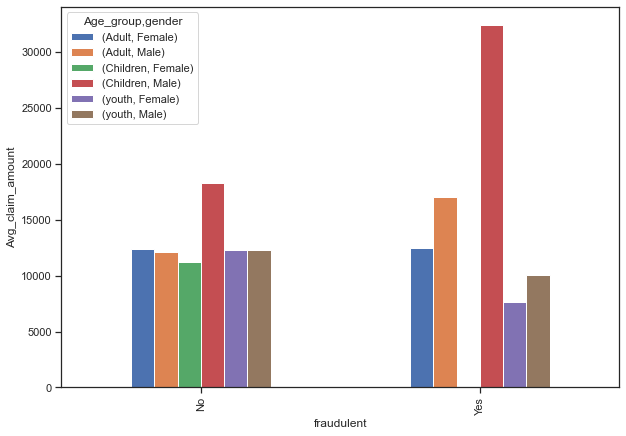

In [53]:
fraud_avg_claim_amt.plot(kind='bar',figsize=(10,7))
plt.ylabel('Avg_claim_amount')

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

In [54]:
import scipy.stats as stats

### 16. Is there any similarity in the amount claimed by males and females?

In [55]:
female_claim = insurance_data.loc[insurance_data.gender == 'Female',['claim_amount']]

In [56]:
male_claim = insurance_data.loc[insurance_data.gender == 'Male',['claim_amount']]

In [96]:
print(female_claim.mean())
print(male_claim.mean())

claim_amount    12062.634707
dtype: float64
claim_amount    12853.058506
dtype: float64


In [57]:
ttest,p_vlue = stats.ttest_ind(a=male_claim,b=female_claim,equal_var=False)

In [58]:
print('P Value :',p_vlue)

P Value : [0.32996965]


In [59]:
print('T Score : ',ttest)

T Score :  [0.97461362]


In [60]:
# alpha value is 0.05 or 5%

if p_vlue < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Accept


- t val: 0.97461362

- Significance Level: 0.05 (5%)
- P value: 0.32996965
- p val > signi value
- Accepting the H0
- Ha: 12853.058506 == 12062.634707
<br>

- **Analysis** : There is no statistically significant difference between the claim amount of Males and Females

### 17. Is there any relationship between age category and segment?

In [61]:
from scipy.stats import chi2

In [62]:
age_seg_dataset = pd.crosstab(insurance_data['Age_group'],insurance_data['Segment'])
age_seg_dataset

Segment,Gold,Platinum,Silver
Age_group,,,
Adult,265,242,243
Children,4,4,0
youth,106,116,105


In [63]:
chi_test = stats.chi2_contingency(age_seg_dataset)

In [64]:
chi_test

(5.078084727560357,
 0.2793789452713292,
 4,
 array([[259.21658986, 250.23041475, 240.55299539],
        [  2.76497696,   2.66912442,   2.56589862],
        [113.01843318, 109.10046083, 104.88110599]]))

In [100]:
chi_square_statistics = chi_test[0]
p_value = chi_test[1]
dof = chi_test[2]

In [103]:
alpha = 0.05

In [104]:
critical_value = chi2.ppf(q=1-alpha,df=dof)

In [106]:
#p_values = 1 - chi2.cdf(x=chi_square_statistics,df=dof)

In [107]:
print('critical_value :',critical_value)
print('chi_square_statistics :',chi_square_statistics)
print('p_values:',p_values)
print('Significance level :',alpha)
print('Degree of freedom :',dof)

critical_value : 9.487729036781154
chi_square_statistics : 5.078084727560357
p_values: 0.2793789452713292
Significance level : 0.05
Degree of freedom : 4


In [70]:
if chi_square_statistics >= critical_value:
    print('Reject H0, There is a relationship between 2 categorical variables')
else:
    print('Accept H0, There is no relationship between 2 categorical variables')
    
if p_values < alpha:
    print('Reject H0, There is a relationship between 2 categorical variables')
else:
    print('Accept H0, There is no relationship between 2 categorical variables')

Accept H0, There is no relationship between 2 categorical variables
Accept H0, There is no relationship between 2 categorical variables


In [97]:
if p_values < 0.10:
    print('Reject H0, There is a relationship between 2 categorical variables')
else:
    print('Accept H0, There is no relationship between 2 categorical variables')

Accept H0, There is no relationship between 2 categorical variables


- chi square val: 5.078084727560357
- DoF: 4

-----------------------------------------------
- Significance Level: 0.05 (5%)
- P value: 0.27937
- p val > signi value
- Accepting the H0
- H0: **No relation b/w segment and the Age group**
<br>

-----------------------------------------------

- Significance Level: 0.10 (10%)
- P value: 0.27937
- p val > signi value
- Accepting the H0
- H0: **No relation b/w segment and the Age group**
<br>

### 18. The current year has shown a significant rise in claim amounts ascompared to 2016-17 fiscal average which was '$10,000'.

In [71]:
claim_data_2018 = insurance_data.loc[insurance_data.claim_date.dt.year > 2017,'claim_amount']

In [72]:
claim_data_2017 = insurance_data.loc[insurance_data.claim_date.dt.year < 2018,'claim_amount']

In [110]:
print(round(claim_data_2018.mean()))

12701


In [73]:
t_stat,p_value = stats.ttest_1samp(claim_data_2018,popmean=10000)

In [74]:
print('T Score : ',t_stat)
print('P Value :',p_value)

T Score :  4.421788475402985
P Value : 1.2086880225728461e-05


In [75]:
if p_value < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Reject


- t val: 4.421788475402985

- Significance Level: 0.05 (5%)
- P value: 1.2086880225728461e-05 (LOW)
- p val < signi value
- Accepting the Ha
- Ha: 10000 != 12701
<br>

- **Analysis** : The rise in claim amount of the currect year has significantly increase from 10000 to 12701.

### 19. Is there any difference between age groups and insurance claims?

In [79]:
claim_age_grp = insurance_data.loc[:,['total_policy_claims','Age_group']]

In [80]:
claim_age_grp.total_policy_claims.isna().sum()

10

In [81]:
claim_age_grp = claim_age_grp.dropna(axis=0,subset=['total_policy_claims'])

In [82]:
Adult_grp = claim_age_grp.loc[claim_age_grp['Age_group']=='Adult','total_policy_claims']

In [83]:
youth_grp = claim_age_grp.loc[claim_age_grp['Age_group']=='youth','total_policy_claims']

In [84]:
Children_grp = claim_age_grp.loc[claim_age_grp['Age_group']=='Children','total_policy_claims']

In [85]:
print('Mean of Adult_grp    :',Adult_grp.mean())
print('Mean of youth_grp    :',youth_grp.mean())
print('Mean of Children_grp :',Children_grp.mean())

Mean of Adult_grp    : 1.5673854447439353
Mean of youth_grp    : 1.633846153846154
Mean of Children_grp : 1.5


In [86]:
Stats,p_value = stats.f_oneway(Adult_grp,youth_grp,Children_grp)

In [111]:
print('p_value :',p_value)
print('f_stats :',Stats)

p_value : 0.2793789452713292
f_stats : 0.40222233987179073


In [112]:
# alpha value is 0.05 or 5%

if p_value < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Accept


- f val: 0.40222233987179073

- Significance Level: 0.05 (5%)
- P value: 0.2793789452713292
- p val > signi value
- Accepting the H0
- H0: 1.5 == 1.6 == 1.5.2
<br>

- **Analysis** : No,there is not any difference between age groups in terms of insurance claims.

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [89]:
corr_totalclaim_claimamt = insurance_data.total_policy_claims.corr(insurance_data.claim_amount)

In [90]:
corr_totalclaim_claimamt

-0.017543087395457437

In [91]:
if round(corr_totalclaim_claimamt) ==0:
    print('No,relationship or absolutely independent variable')
elif round(corr_totalclaim_claimamt) ==1:
    print('Perfect positive corelation')
elif round(corr_totalclaim_claimamt) ==-1:
    print('Negative corelation')

No,relationship or absolutely independent variable
